In [478]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/train-data/train.csv


In [479]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')

In [480]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')

### Exploratory Data Analysis

In [481]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [482]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [483]:
train.shape

(891, 12)

In [484]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [485]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [486]:
import numpy
train.describe(include=numpy.number)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [487]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [488]:
train['Survived'].mean()

0.3838383838383838

In [489]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [490]:
df_train=train.drop(columns= [ 'Name', 'Ticket', 'Cabin'])

In [491]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [492]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [493]:
df_train=df_train.infer_objects(copy=False)
df_train=df_train.interpolate()

/tmp/ipykernel_30/3441044018.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_train=df_train.interpolate()


In [494]:
df_train.replace(['male','female'],['0','1'],inplace=True)
df_train.replace(['S','C','Q'],['0','1','2'],inplace=True)

In [495]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_30/3833210086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


In [496]:
df_train['Family_size']=df_train['SibSp']+df_train['Parch']+1

In [497]:
df_train.drop(columns=['Parch','SibSp'])

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,1,0,3,0,22.0,7.2500,0,2
1,2,1,1,1,38.0,71.2833,1,2
2,3,1,3,1,26.0,7.9250,0,1
3,4,1,1,1,35.0,53.1000,0,2
4,5,0,3,0,35.0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,0,1
887,888,1,1,1,19.0,30.0000,0,1
888,889,0,3,1,22.5,23.4500,0,4
889,890,1,1,0,26.0,30.0000,1,1


In [498]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

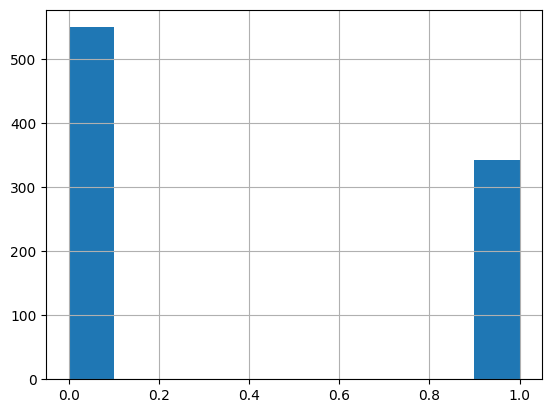

In [499]:
df_train['Survived'].hist()

In [500]:
import matplotlib.pyplot as plt
import seaborn as sb

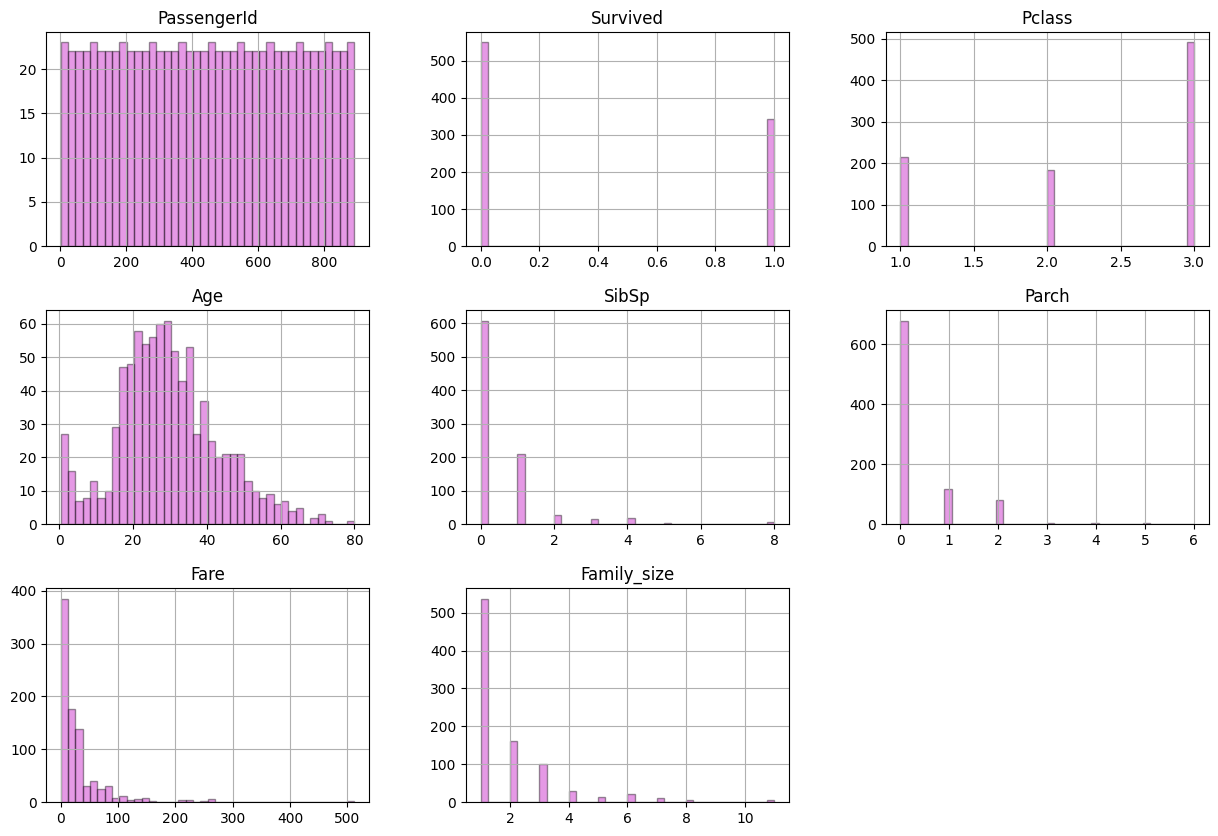

In [501]:
df_train.hist(alpha=0.4,bins=40,color='m',edgecolor='black',figsize=(15,10))
plt.show()


In [502]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: >

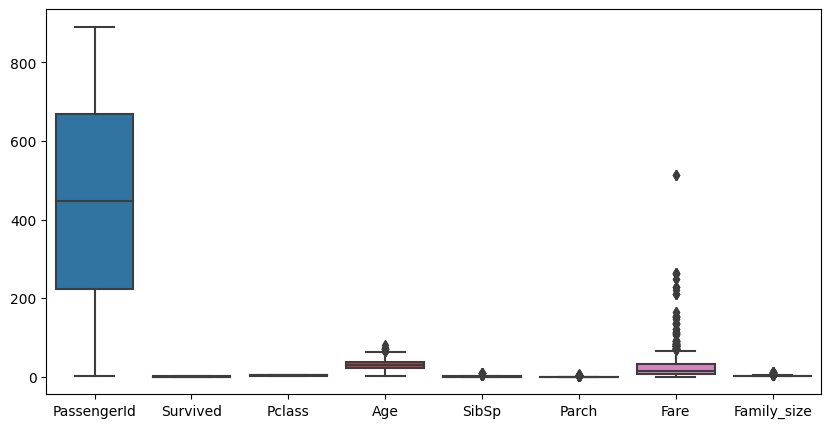

In [503]:
plt.figure(figsize=(10,5))
sb.boxplot(df_train)

<Axes: >

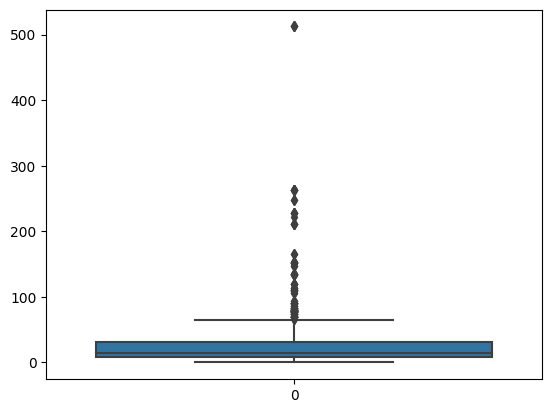

In [504]:
sb.boxplot(df_train['Fare'])

In [505]:
len(df_train[df_train['Fare']>60])

122

In [506]:
df_train[df_train['Fare']>100].index

Index([ 27,  31,  88, 118, 195, 215, 258, 268, 269, 297, 299, 305, 306, 307,
       311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390, 393, 435,
       438, 498, 505, 527, 537, 544, 550, 557, 581, 609, 659, 660, 679, 689,
       698, 700, 708, 716, 730, 737, 742, 763, 779, 802, 856],
      dtype='int64')

In [507]:
df_train.drop(index=[27,  31,  88, 118, 195, 215, 258, 268, 269, 297, 299, 305, 306, 307,
       311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390, 393, 435,
       438, 498, 505, 527, 537, 544, 550, 557, 581, 609, 659, 660, 679, 689,
       698, 700, 708, 716, 730, 737, 742, 763, 779, 802, 856])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,1,0,3,0,22.0,1,0,7.2500,0,2
1,2,1,1,1,38.0,1,0,71.2833,1,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,1
887,888,1,1,1,19.0,0,0,30.0000,0,1
888,889,0,3,1,22.5,1,2,23.4500,0,4
889,890,1,1,0,26.0,0,0,30.0000,1,1


In [508]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.025332,-0.057527,-0.001652,0.012658,-0.030467,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.062164,-0.035322,0.081629,0.257307,0.106811,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.304934,0.083081,0.018443,-0.549500,0.045702,0.065997
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.061332,0.114631,0.245489,0.182333,0.116569,0.200988
Age,0.025332,-0.062164,-0.304934,-0.061332,1.000000,-0.213410,-0.170013,0.087119,0.026549,-0.230794
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.213410,1.000000,0.414838,0.159651,-0.059961,0.890712
Parch,-0.001652,0.081629,0.018443,0.245489,-0.170013,0.414838,1.000000,0.216225,-0.078665,0.783111
Fare,0.012658,0.257307,-0.549500,0.182333,0.087119,0.159651,0.216225,1.000000,0.062142,0.217138
Embarked,-0.030467,0.106811,0.045702,0.116569,0.026549,-0.059961,-0.078665,0.062142,1.000000,-0.080281
Family_size,-0.040143,0.016639,0.065997,0.200988,-0.230794,0.890712,0.783111,0.217138,-0.080281,1.000000


In [509]:
df_train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.062164
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked       0.106811
Family_size    0.016639
Name: Survived, dtype: float64

<Axes: >

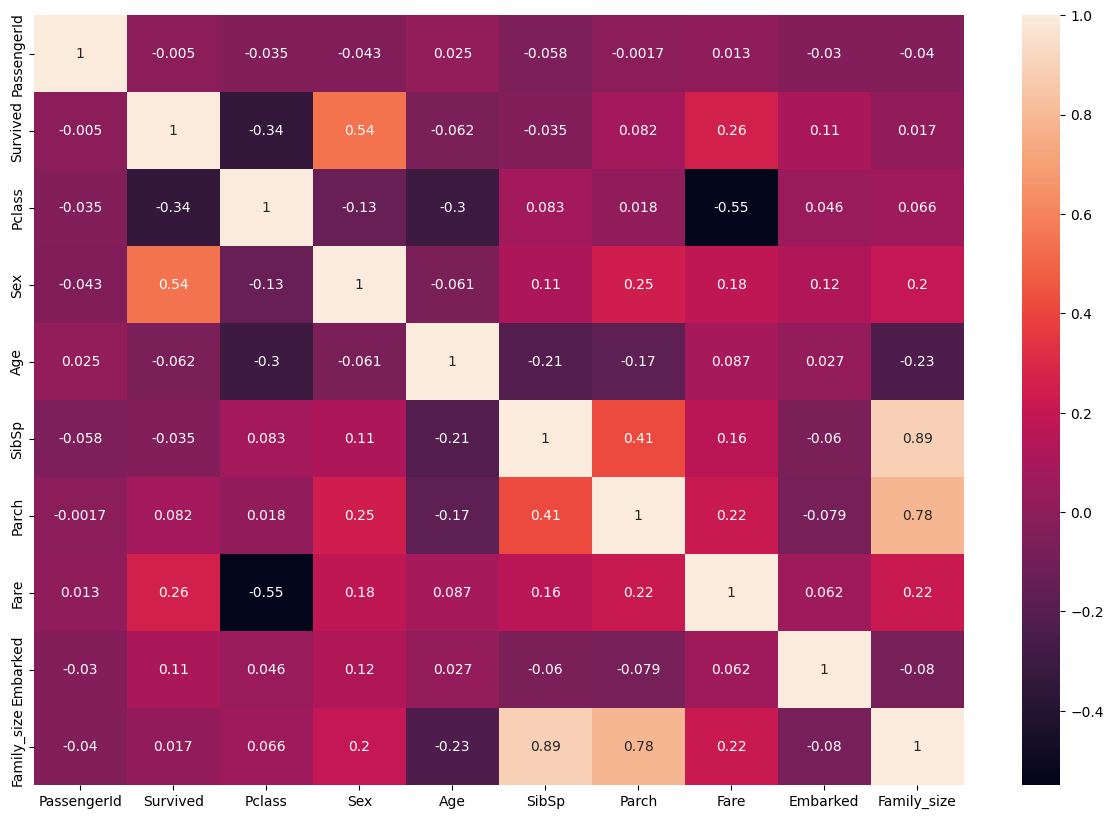

In [510]:
plt.figure(figsize=(15,10))
sb.heatmap(df_train.corr(),annot=True)

### MODEL BUILDING

In [511]:
X=df_train.drop(columns=['Survived','SibSp', 'Parch'])

In [512]:
y=df_train.drop(columns=['PassengerId',  'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Family_size'])

In [513]:
from sklearn.model_selection import train_test_split

In [514]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

### LOGISTIC REGRESSION

In [515]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [516]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_val)

accuracy_logreg = accuracy_score(y_val, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

Logistic Regression Accuracy: 0.7709


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [517]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


In [518]:
precision_score=precision_score(y_val,y_pred)
print(f"Logistic Regression Precison: {precision_score:.4f}")

Logistic Regression Precison: 0.7260


In [519]:
recall=recall_score(y_val,y_pred)
print(f"recall:{recall:.4f}")

recall:0.7162


In [520]:
f1_score=f1_score(y_val,y_pred)
print(f"f1_score:{f1_score:.4f}")

f1_score:0.7211


In [521]:
cf=confusion_matrix(y_val,y_pred)
print(f"confusion_matrix:\n{cf}")

confusion_matrix:
[[85 20]
 [21 53]]


### SUPPORT VECTOR MACHINE

In [522]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

In [523]:
svc=SVC()

svc.fit(X_train,y_train)

y_pred2=svc.predict(X_val)

accuracy_svc=accuracy_score(y_val,y_pred2)

print(f"accuracy:{accuracy_svc:.4f}")



accuracy:0.5978


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [524]:
recall = recall_score(y_val, y_pred2)
print(f"Recall: {recall:.4f}")


f1 = f1_score(y_val, y_pred2)
print(f"F1-Score: {f1:.4f}")


cm = confusion_matrix(y_val, y_pred2)
print(f"Confusion Matrix:\n{cm}")

precison=precision_score(y_val,y_pred2)
print(f"precison:{precison:.4f}")

Recall: 0.0541
F1-Score: 0.1000
Confusion Matrix:
[[103   2]
 [ 70   4]]
precison:0.6667


### RANDOM FOREST CLASSIFIER

In [525]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

In [526]:
rf=RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred3=rf.predict(X_val)



/tmp/ipykernel_30/597166465.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [527]:
accuracy_rf = accuracy_score(y_val, y_pred3)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

recall = recall_score(y_val, y_pred3)
print(f"Recall: {recall:.4f}")


f1 = f1_score(y_val, y_pred3)
print(f"F1-Score: {f1:.4f}")


cm = confusion_matrix(y_val, y_pred3)
print(f"Confusion Matrix:\n{cm}")

precison=precision_score(y_val,y_pred3)
print(f"precison:{precison:.4f}")

Random Forest Accuracy: 0.8101
Recall: 0.7162
F1-Score: 0.7571
Confusion Matrix:
[[92 13]
 [21 53]]
precison:0.8030


In [528]:
from sklearn.metrics import classification_report

# Assuming y_val is your true labels and y_pred3 is your predicted labels
print(classification_report(y_val, y_pred3))


              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### K-NEAREST NEIGHBORS

In [529]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

In [530]:
knn=KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred4=knn.predict(X_val)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [531]:
accuracy = accuracy_score(y_val, y_pred4)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_val, y_pred4)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_val, y_pred4)
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred4)
print(f"Confusion Matrix:\n{cm}")

precison=precision_score(y_val,y_pred4)
print(f"precison:{precison:.4f}")

Accuracy: 0.6536
Recall: 0.4189
F1-Score: 0.5000
Confusion Matrix:
[[86 19]
 [43 31]]
precison:0.6200


### Gradient BoostinG Classifier

In [532]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

In [533]:
gbc=GradientBoostingClassifier()

gbc.fit(X_train,y_train)

y_pred5=gbc.predict(X_val)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [534]:
accuracy = accuracy_score(y_val, y_pred5)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_val, y_pred5)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_val, y_pred5)
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred5)
print(f"Confusion Matrix:\n{cm}")

precison=precision_score(y_val,y_pred5)
print(f"precison:{precison:.4f}")

Accuracy: 0.8101
Recall: 0.7162
F1-Score: 0.7571
Confusion Matrix:
[[92 13]
 [21 53]]
precison:0.8030


### Naive Bayes Classifier

In [535]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

In [536]:
nb=GaussianNB()

nb.fit(X_train,y_train)

y_pred6=nb.predict(X_val)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [537]:
accuracy = accuracy_score(y_val, y_pred6)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_val, y_pred6)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_val, y_pred6)
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred6)
print(f"Confusion Matrix:\n{cm}")

precison=precision_score(y_val,y_pred6)
print(f"precison:{precison:.4f}")

Accuracy: 0.7877
Recall: 0.7297
F1-Score: 0.7397
Confusion Matrix:
[[87 18]
 [20 54]]
precison:0.7500


### Decision Tree Classifier

In [538]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Predict on the validation set
y_pred7 = dt.predict(X_val)



In [539]:
accuracy = accuracy_score(y_val, y_pred7)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_val, y_pred7)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_val, y_pred7)
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred7)
print(f"Confusion Matrix:\n{cm}")

precison=precision_score(y_val,y_pred7)
print(f"precison:{precison:.4f}")

Accuracy: 0.7207
Recall: 0.6892
F1-Score: 0.6711
Confusion Matrix:
[[78 27]
 [23 51]]
precison:0.6538


### AdaBoost Classifier

In [540]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
ada = AdaBoostClassifier()

# Train the model
ada.fit(X_train, y_train)

# Predict on the validation set
y_pred8 = ada.predict(X_val)



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [541]:
accuracy = accuracy_score(y_val, y_pred8)
print(f" Accuracy: {accuracy:.4f}")

recall = recall_score(y_val, y_pred8)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_val, y_pred8)
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred8)
print(f"Confusion Matrix:\n{cm}")



 Accuracy: 0.7989
Recall: 0.7027
F1-Score: 0.7429
Confusion Matrix:
[[91 14]
 [22 52]]


In [542]:
precison=precision_score(y_val,y_pred8)
print(f"precison:{precison:.4f}")

precison:0.7879


### Extra Trees Classifier

In [543]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the model
et = ExtraTreesClassifier()

# Train the model
et.fit(X_train, y_train)

# Predict on the validation set
y_pred9= et.predict(X_val)



/tmp/ipykernel_30/1890728885.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(X_train, y_train)


In [544]:
accuracy = accuracy_score(y_val, y_pred9)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_val, y_pred9)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_val, y_pred9)
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred9)
print(f"Confusion Matrix:\n{cm}")

precison=precision_score(y_val,y_pred9)
print(f"precison:{precison:.4f}")

Accuracy: 0.8268
Recall: 0.7297
F1-Score: 0.7770
Confusion Matrix:
[[94 11]
 [20 54]]
precison:0.8308


In [545]:
from sklearn.feature_selection import RFE

selector = RFE(ExtraTreesClassifier(random_state=42), n_features_to_select=10)
selector = selector.fit(X_train, y_train)
y_pred10=selector.predict(X_val)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:326: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X[:, features], y, **fit_params)


In [546]:
accuracy = accuracy_score(y_val, y_pred10)
print(f" Accuracy: {accuracy:.4f}")

 Accuracy: 0.8212


### CatBoostClassifier


In [547]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_state=42)
cat.fit(X_train, y_train)
y_pred15 = cat.predict(X_val)


Learning rate set to 0.008911
0:	learn: 0.6877689	total: 1.16ms	remaining: 1.16s
1:	learn: 0.6818191	total: 2.69ms	remaining: 1.34s
2:	learn: 0.6760037	total: 4.1ms	remaining: 1.36s
3:	learn: 0.6696926	total: 5.56ms	remaining: 1.38s
4:	learn: 0.6645322	total: 6.7ms	remaining: 1.33s
5:	learn: 0.6592847	total: 8.15ms	remaining: 1.35s
6:	learn: 0.6541055	total: 9.56ms	remaining: 1.35s
7:	learn: 0.6488280	total: 10.7ms	remaining: 1.32s
8:	learn: 0.6452815	total: 11.7ms	remaining: 1.29s
9:	learn: 0.6403424	total: 12.7ms	remaining: 1.26s
10:	learn: 0.6354658	total: 14ms	remaining: 1.26s
11:	learn: 0.6313251	total: 14.8ms	remaining: 1.22s
12:	learn: 0.6264194	total: 16ms	remaining: 1.22s
13:	learn: 0.6216579	total: 17.3ms	remaining: 1.22s
14:	learn: 0.6163087	total: 18.6ms	remaining: 1.22s
15:	learn: 0.6121899	total: 20ms	remaining: 1.23s
16:	learn: 0.6078099	total: 21.2ms	remaining: 1.23s
17:	learn: 0.6031616	total: 22.4ms	remaining: 1.22s
18:	learn: 0.5987180	total: 23.7ms	remaining: 1.22s


In [548]:
accuracy = accuracy_score(y_val, y_pred15)
print(f" Accuracy: {accuracy:.4f}")

 Accuracy: 0.8156


### Prediction on Test Data

In [549]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [550]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

In [551]:
test.drop(columns=['Name','Cabin','SibSp', 'Parch','Ticket'],inplace=True)

In [552]:
test['Age'].fillna(test['Age'].mean(), inplace=True)  
test['Fare'].fillna(test['Fare'].median(), inplace=True)

/tmp/ipykernel_30/1694640683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].mean(), inplace=True)
/tmp/ipykernel_30/1694640683.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [553]:
test.replace(['male','female'],['0','1'],inplace=True)
test.replace(['S','C','Q'],['0','1','2'],inplace=True)

In [554]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_size
0,892,3,0,34.50000,7.8292,2,1
1,893,3,1,47.00000,7.0000,0,2
2,894,2,0,62.00000,9.6875,2,1
3,895,3,0,27.00000,8.6625,0,1
4,896,3,1,22.00000,12.2875,0,3
...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,8.0500,0,1
414,1306,1,1,39.00000,108.9000,1,1
415,1307,3,0,38.50000,7.2500,0,1
416,1308,3,0,30.27259,8.0500,0,1


In [555]:

final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)

test_predictions = final_model.predict(test)


submission = pd.DataFrame({
    'PassengerId': pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId'],
    'Survived': test_predictions
})




/tmp/ipykernel_30/1991518819.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(X, y)


In [556]:
submission.to_csv('titanic_submission.csv', index=False)